# Mean-Variance Optimization with ESG Scores
In this notebook, we will perform a mean-variance optimization using historical stock prices and consider the inclusion of ESG scores in the selection process. We use various risk models, covariance estimations, and optimization techniques to illustrate the process.

## 1. Introduction and Setup
We start by importing necessary libraries and setting up the environment for analysis.

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

/Users/vinayjogani/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [16]:
tickers = ["AAPL", "MSFT", "TSLA", "AMZN", "GOOGL","META", "JNJ", "PG", "NVDA", "NFLX", "V", "JPM", "XOM", "PEP", "DIS"]

## 2. Data Collection
### Download OHLC Data
We use Yahoo Finance to download 5 years of daily OHLC (Open-High-Low-Close) data for the selected tickers.

In [17]:
ohlc = yf.download(tickers, period="5y")

[*********************100%%**********************]  15 of 15 completed


In [18]:
ohlc.tail()
prices = ohlc["Adj Close"].dropna(how="all")
prices.tail()     

Ticker,AAPL,AMZN,DIS,GOOGL,JNJ,JPM,META,MSFT,NFLX,NVDA,PEP,PG,TSLA,V,XOM
Date,,,,,,,,,,,,,,,
2024-10-02,226.779999,184.759995,94.150002,165.860001,161.169998,206.027451,572.809998,417.130005,711.090027,118.849998,169.550003,171.919998,249.020004,277.000000,121.519997
2024-10-03,225.669998,181.960007,93.629997,165.860001,160.500000,203.979996,582.770020,416.540009,706.799988,122.849998,168.529999,170.119995,240.660004,276.859985,122.580002
2024-10-04,226.800003,186.509995,95.150002,167.059998,160.289993,211.220001,595.940002,416.059998,719.700012,124.919998,167.970001,168.880005,250.080002,277.929993,124.830002
2024-10-07,221.690002,180.800003,92.389999,162.979996,159.529999,210.929993,584.780029,409.540009,701.919983,127.720001,167.210007,167.119995,240.830002,273.790009,125.370003
2024-10-08,225.770004,182.720001,92.510002,164.380005,159.690002,210.750000,592.890015,414.709991,721.760010,132.889999,170.419998,168.160004,244.500000,274.959991,122.040001


## 3. Data Exploration
### Plot Adjusted Close Prices
We visualize the adjusted closing prices of the selected stocks since January 2020.

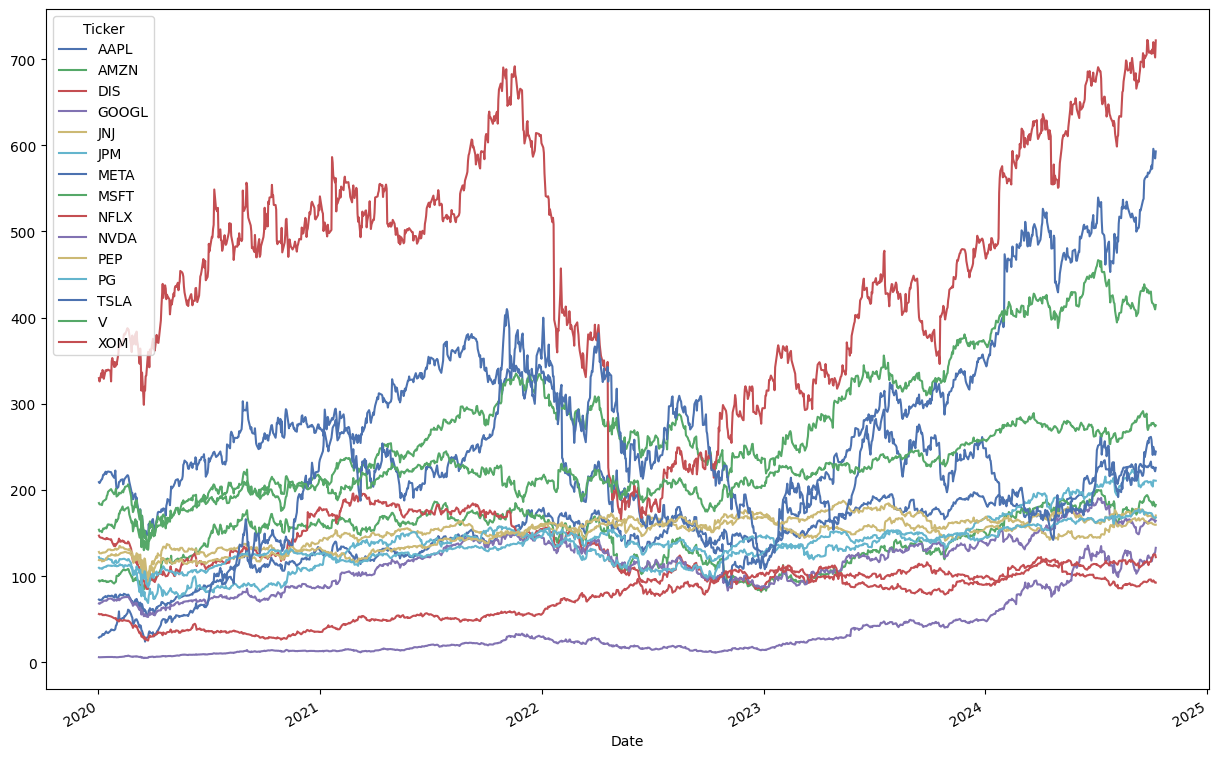

In [19]:
prices[prices.index >= "2020-01-01"].plot(figsize=(15,10));

## 4. Covariance Matrix Calculation
### Sample Covariance Calculation
Next, we calculate the sample covariance matrix of stock returns to estimate the risk.

In [20]:
# Calculate the covariance matrix 

from pypfopt import risk_models
from pypfopt import plotting

sample_cov = risk_models.sample_cov(prices, frequency=252)
sample_cov
     


Ticker,AAPL,AMZN,DIS,GOOGL,JNJ,JPM,META,MSFT,NFLX,NVDA,PEP,PG,TSLA,V,XOM
Ticker,,,,,,,,,,,,,,,
AAPL,0.100625,0.067174,0.047692,0.066808,0.023417,0.043009,0.079782,0.071864,0.065991,0.103771,0.034200,0.028040,0.102845,0.052040,0.031209
AMZN,0.067174,0.126619,0.049293,0.073840,0.013411,0.030206,0.096939,0.072878,0.087566,0.111298,0.022667,0.017613,0.101712,0.040562,0.016843
DIS,0.047692,0.049293,0.115280,0.050436,0.019450,0.061412,0.059149,0.049071,0.054541,0.071416,0.027186,0.021588,0.071985,0.054654,0.051475
GOOGL,0.066808,0.073840,0.050436,0.102379,0.019856,0.042210,0.092177,0.073147,0.065626,0.103333,0.028286,0.023014,0.083992,0.049006,0.029990
JNJ,0.023417,0.013411,0.019450,0.019856,0.039422,0.026099,0.018231,0.023236,0.012144,0.016923,0.026348,0.025186,0.011311,0.024638,0.020229
JPM,0.043009,0.030206,0.061412,0.042210,0.026099,0.102352,0.044618,0.041385,0.028378,0.057230,0.030818,0.025033,0.056255,0.054305,0.063734
META,0.079782,0.096939,0.059149,0.092177,0.018231,0.044618,0.200439,0.083758,0.100935,0.128719,0.027503,0.022559,0.098628,0.055267,0.024068
MSFT,0.071864,0.072878,0.049071,0.073147,0.023236,0.041385,0.083758,0.091709,0.067301,0.111387,0.033990,0.028908,0.090448,0.052043,0.025568
NFLX,0.065991,0.087566,0.054541,0.065626,0.012144,0.028378,0.100935,0.067301,0.206894,0.116038,0.021640,0.017360,0.108942,0.039487,0.015119


### Plotting Covariance Matrix
We visualize the sample covariance matrix, including correlations between the stocks.

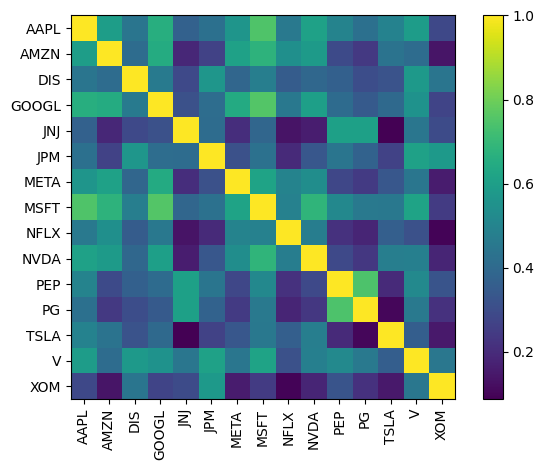

In [21]:
plotting.plot_covariance(sample_cov, plot_correlation=True);
     

### Ledoit-Wolf Shrinkage Explanation
The sample covariance matrix may not be the best choice for risk modeling due to its sensitivity to extreme values. We will use Ledoit-Wolf shrinkage to improve the covariance estimation.

However, the sample covariance matrix should not be the default choice for risk model. In the below we will use Ledoit-Wolf shrinkage that reduces extreme values.

## 5. Expected Returns Calculation
We calculate the expected returns using the Capital Asset Pricing Model (CAPM).

In [22]:
from pypfopt import expected_returns

mu = expected_returns.capm_return(prices)
mu

Ticker
AAPL     0.306330
AMZN     0.309496
DIS      0.270841
GOOGL    0.301852
JNJ      0.119729
JPM      0.240420
META     0.373139
MSFT     0.305777
NFLX     0.334230
NVDA     0.469598
PEP      0.160966
PG       0.135445
TSLA     0.478422
V        0.249920
XOM      0.190562
Name: mkt, dtype: float64

## 6. Mean-Variance Optimization
Using the calculated expected returns and the Ledoit-Wolf covariance matrix, we perform a mean-variance optimization to find the optimal portfolio weights.

In [23]:
from pypfopt import EfficientFrontier
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()
ef = EfficientFrontier(mu, S, weight_bounds = (0,1))

In [24]:
ef.max_sharpe()
weights = ef.clean_weights()
weights

OrderedDict([('AAPL', 0.06717),
             ('AMZN', 0.06641),
             ('DIS', 0.06688),
             ('GOOGL', 0.06675),
             ('JNJ', 0.06505),
             ('JPM', 0.06711),
             ('META', 0.06703),
             ('MSFT', 0.06731),
             ('NFLX', 0.06677),
             ('NVDA', 0.06713),
             ('PEP', 0.06653),
             ('PG', 0.06558),
             ('TSLA', 0.06693),
             ('V', 0.06688),
             ('XOM', 0.06647)])

In [25]:
ef.portfolio_performance(verbose = True)

Expected annual return: 28.4%
Annual volatility: 23.6%
Sharpe Ratio: 1.12


(0.2837420079823333, 0.23618010010329984, 1.1166986882763554)

## 7. Adding an ESG score constraint

In [26]:
esg_scores = [0.89, 0.6, 0.1, 0.52, 0.36, 0.11, 0.43, 0.29, 0.2, 0.19, 0.69, 0.93, 0.63, 0.54, 0.22]

In [27]:
portfolio_min_score = 0.6 # create a portfolio with min 0.6 ESG score

In [28]:
ef_esg = EfficientFrontier(mu, S)
ef_esg.add_constraint(lambda w: esg_scores @ w >= portfolio_min_score)
ef_esg.max_sharpe()

OrderedDict([('AAPL', 0.1475818583879355),
             ('AMZN', 0.0876114960932156),
             ('DIS', 0.0345841452761071),
             ('GOOGL', 0.077453204578554),
             ('JNJ', 0.0),
             ('JPM', 0.0227463097200318),
             ('META', 0.0642267171090634),
             ('MSFT', 0.0),
             ('NFLX', 0.0461648453139376),
             ('NVDA', 0.0501260594130808),
             ('PEP', 0.05268345255036),
             ('PG', 0.1898900595812028),
             ('TSLA', 0.0727214604046293),
             ('V', 0.0962016275686821),
             ('XOM', 0.0580087640032001)])

In [29]:
ef_esg.portfolio_performance(verbose = True)

Expected annual return: 27.8%
Annual volatility: 23.3%
Sharpe Ratio: 1.11


(0.27756172054452, 0.23293594538232498, 1.1057190856558268)

<Axes: xlabel='Volatility', ylabel='Return'>

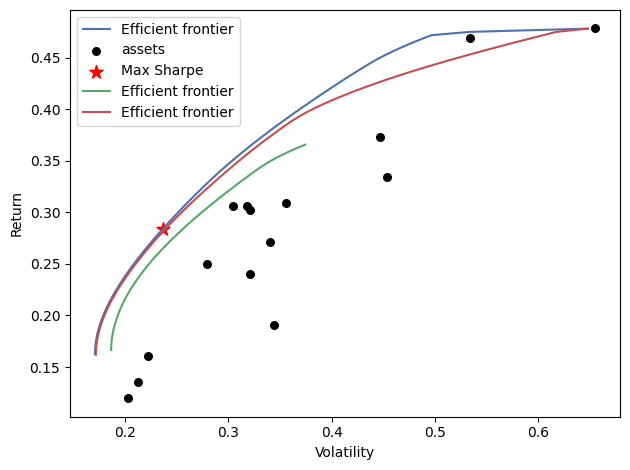

In [30]:
ef = EfficientFrontier(mu, S, weight_bounds = (0,1))
fig, ax = plt.subplots()
ef_max_sharpe = ef.deepcopy()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)

# Find the tangency portfolio
ef_max_sharpe.max_sharpe()
ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

ef_esg_aggressive = EfficientFrontier(mu, S)
portfolio_min_score = 0.8
ef_esg_aggressive.add_constraint(lambda w: esg_scores @ w >= portfolio_min_score)
plotting.plot_efficient_frontier(ef_esg_aggressive, ax=ax, show_assets=False)

ef_esg_mild = EfficientFrontier(mu, S)
portfolio_min_score = 0.6
ef_esg_mild.add_constraint(lambda w: esg_scores @ w >= portfolio_min_score)
plotting.plot_efficient_frontier(ef_esg_mild, ax=ax, show_assets=False)


In [31]:
ef_esg_mild = EfficientFrontier(mu, S)
portfolio_min_score = 0.6
ef_esg_mild.add_constraint(lambda w: esg_scores @ w >= portfolio_min_score)
ef_esg_mild.max_sharpe()
esg_mild = ef_esg_mild.portfolio_performance(verbose = False)

In [32]:
ef_esg_aggressive = EfficientFrontier(mu, S)
portfolio_min_score = 0.8
ef_esg_aggressive.add_constraint(lambda w: esg_scores @ w >= portfolio_min_score)
ef_esg_aggressive.max_sharpe()
esg_agg = ef_esg_aggressive.portfolio_performance(verbose = False)

In [33]:
ef = EfficientFrontier(mu, S, weight_bounds = (0,1))
ef.max_sharpe()
no_esg = ef.portfolio_performance(verbose = False)

In [34]:
df = pd.DataFrame({'no_esg_constraints' : no_esg, 'mild_esg_target' : esg_mild, 'aggressive_esg_target' : esg_agg})
df.index = ['Expected ann return', 'Ann Vol', 'Sharpe Ratio']
df

,no_esg_constraints,mild_esg_target,aggressive_esg_target
Expected ann return,0.283742,0.277562,0.265998
Ann Vol,0.236180,0.232936,0.237370
Sharpe Ratio,1.116699,1.105719,1.036347


## 8. Backtesting 

In [35]:
optimized_weights = [1/15] * 15

In [36]:
data = yf.download(tickers, start="2018-01-01", end="2023-01-01")['Adj Close']

[*********************100%%**********************]  15 of 15 completed


In [37]:
daily_returns = data.pct_change().dropna()

In [38]:
def backtest_portfolio(weights, returns, initial_investment=100000):
    # Calculate portfolio daily returns
    portfolio_returns = returns.dot(weights)
    # Calculate portfolio value over time
    portfolio_values = (1 + portfolio_returns).cumprod() * initial_investment
    return portfolio_values

In [39]:
portfolio_values = backtest_portfolio(optimized_weights, daily_returns)

In [40]:
benchmark_data = yf.download('^GSPC', start="2018-01-01", end="2023-01-01")['Adj Close']
benchmark_returns = benchmark_data.pct_change().dropna()
benchmark_values = (1 + benchmark_returns).cumprod() * 100000

[*********************100%%**********************]  1 of 1 completed


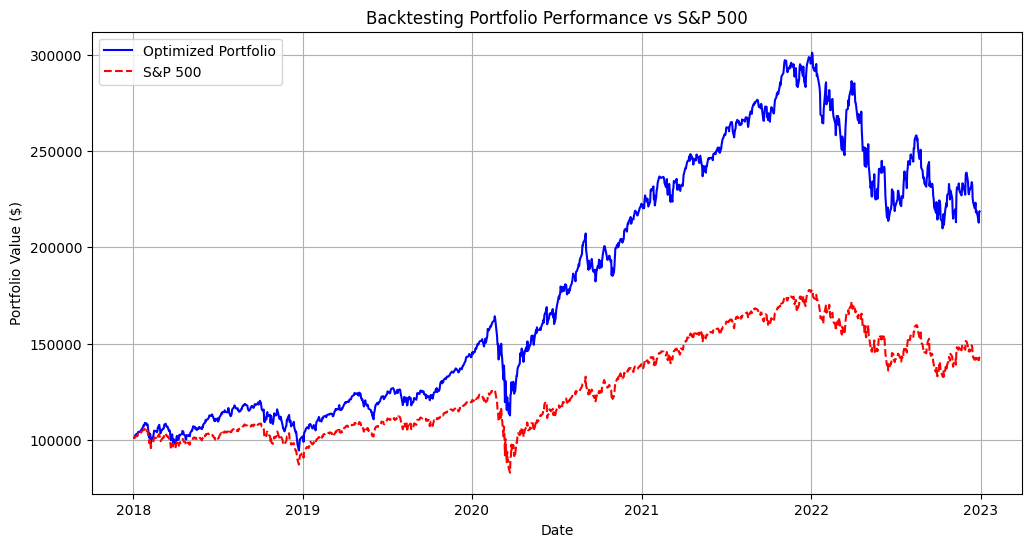

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(portfolio_values, label="Optimized Portfolio", color='b')
plt.plot(benchmark_values, label="S&P 500", color='r', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.title("Backtesting Portfolio Performance vs S&P 500")
plt.legend()
plt.grid(True)
plt.show()

## 9. Incorporate ESG Scores in the Optimization Process

In [42]:
from scipy.optimize import minimize

In [44]:
esg_scores = {
    "AAPL": 0.89, "MSFT": 0.6, "TSLA": 0.1, "AMZN": 0.52, "GOOGL": 0.36,
    "META": 0.11, "JNJ": 0.43, "PG": 0.29, "NVDA": 0.2, "NFLX": 0.19,
    "V": 0.69, "JPM": 0.93, "XOM": 0.63, "PEP": 0.54, "DIS": 0.22}

In [46]:
# Load historical data for the tickers you have already selected
tickers = list(esg_scores.keys())
data = yf.download(tickers, start="2018-01-01", end="2023-01-01")['Adj Close']

[*********************100%%**********************]  15 of 15 completed


In [47]:
# Calculate daily returns for each stock
daily_returns = data.pct_change().dropna()

In [48]:
# Define portfolio optimization function incorporating ESG scores
def esg_objective_function(weights, returns, esg_scores, risk_aversion=0.5):
    # Calculate portfolio return
    portfolio_return = np.dot(weights, returns.mean()) * 252
    # Calculate portfolio risk
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    # Calculate average ESG score of the portfolio
    portfolio_esg_score = np.dot(weights, np.array([esg_scores[ticker] for ticker in tickers]))
    
    # Objective: Maximize return and ESG score while minimizing risk
    # We use risk_aversion to balance between risk minimization and ESG consideration
    objective = - (portfolio_return * (1 - risk_aversion) + portfolio_esg_score * risk_aversion) / portfolio_risk
    return objective

In [49]:
# Constraints: Weights must sum to 1, and each weight must be between 0 and 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})
bounds = [(0, 1) for _ in range(len(tickers))]

In [50]:
# Initial guess for weights
initial_weights = np.array([1/len(tickers)] * len(tickers))

In [51]:
# Perform the optimization
optimized_result = minimize(esg_objective_function, initial_weights, args=(daily_returns, esg_scores),
                            method='SLSQP', bounds=bounds, constraints=constraints)

In [52]:
# Get the optimized weights
optimized_weights = optimized_result.x

In [53]:
# Function to perform backtesting
def backtest_portfolio(weights, returns, initial_investment=100000):
    # Calculate portfolio daily returns
    portfolio_returns = returns.dot(weights)
    # Calculate portfolio value over time
    portfolio_values = (1 + portfolio_returns).cumprod() * initial_investment
    return portfolio_values

In [54]:
# Perform backtesting with the optimized weights
portfolio_values = backtest_portfolio(optimized_weights, daily_returns)

In [55]:
# Download S&P 500 index data for comparison
benchmark_data = yf.download('^GSPC', start="2018-01-01", end="2023-01-01")['Adj Close']
benchmark_returns = benchmark_data.pct_change().dropna()
benchmark_values = (1 + benchmark_returns).cumprod() * 100000

[*********************100%%**********************]  1 of 1 completed


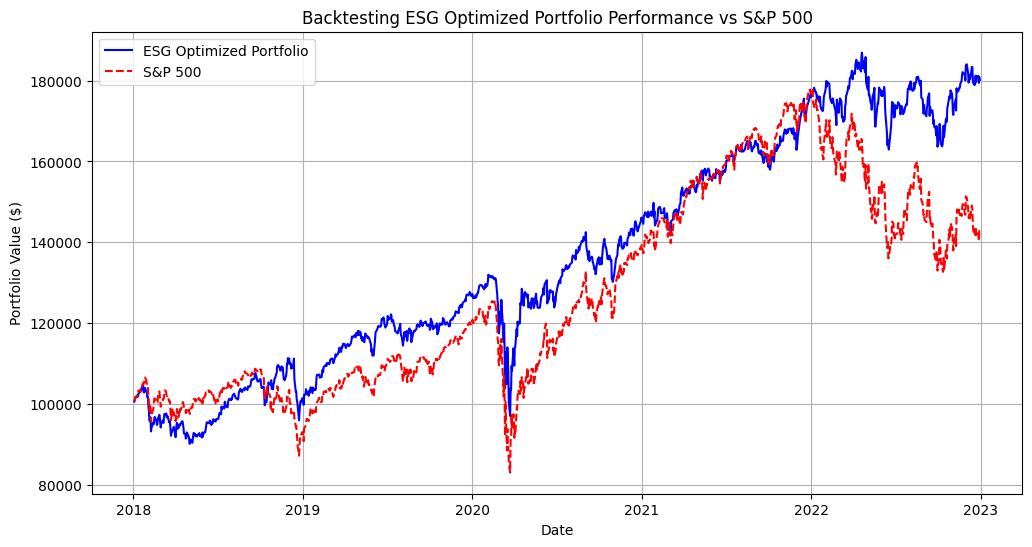

In [56]:
# Plot portfolio vs benchmark
plt.figure(figsize=(12, 6))
plt.plot(portfolio_values, label="ESG Optimized Portfolio", color='b')
plt.plot(benchmark_values, label="S&P 500", color='r', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.title("Backtesting ESG Optimized Portfolio Performance vs S&P 500")
plt.legend()
plt.grid(True)
plt.show()